In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

sns.set(rc={'figure.figsize':(16,8)})

data_path = '../data/train_data/host'

In [2]:
dfs = {}
for file in os.listdir(data_path):
    print('Reading ' + file)
    dfs[file[:-4]] = pd.read_csv(data_path+'/'+file) 

Reading dcos_docker.csv
Reading os_linux.csv
Reading db_oracle_11g.csv
Reading mw_redis.csv
Reading dcos_container.csv


In [3]:
kpis = set()
for df in dfs:
    kpis = kpis.union(set(dfs[df].cmdb_id.unique()))
print((list(kpis)))

['db_008', 'db_001', 'redis_010', 'redis_002', 'redis_005', 'redis_001', 'os_005', 'db_010', 'os_020', 'redis_008', 'os_021', 'os_004', 'db_012', 'os_002', 'os_008', 'os_014', 'docker_007', 'docker_001', 'docker_006', 'os_003', 'db_013', 'redis_006', 'os_018', 'os_007', 'os_012', 'os_010', 'os_015', 'os_009', 'os_019', 'os_016', 'os_001', 'redis_007', 'db_006', 'redis_009', 'docker_008', 'docker_003', 'db_011', 'os_011', 'redis_003', 'db_004', 'db_007', 'db_009', 'db_005', 'db_002', 'os_022', 'os_017', 'db_003', 'redis_011', 'docker_002', 'container_001', 'docker_005', 'docker_004', 'os_006', 'redis_012', 'container_002', 'redis_004', 'os_013']


In [4]:
dfs['dcos_docker'].head()

,itemid,name,bomc_id,timestamp,value,cmdb_id
0,999999996381324,container_session_used,ZJ-004-058,1588521611000,0.0,docker_008
1,999999996381333,container_fgct,ZJ-004-104,1588521611000,0.0,docker_008
2,999999996381334,container_cpu_used,ZJ-004-059,1588521611000,0.0,docker_008
3,999999996381323,container_thread_idle,ZJ-004-063,1588521611000,0.0,docker_008
4,999999996381322,container_thread_running,ZJ-004-062,1588521611000,0.0,docker_008


In [5]:
total_kpis = 0
zero_kpis = 0
for file in dfs:
    print('*'*80)
    print("Num of active KPI's for " + file)
    for name in list(dfs[file]['name'].unique()):
        total_kpis += 1
        print(name, dfs[file][dfs[file].name == name]['value'].sum())
print(total_kpis)

********************************************************************************
Num of active KPI's for dcos_docker
container_session_used 0.0
container_fgct 0.0
container_cpu_used 231980.0
container_thread_idle 0.0
container_thread_running 0.0
container_thread_total 0.0
container_fgc 0.0
container_thread_used_pct 0.0
container_mem_used 767579.0
********************************************************************************
Num of active KPI's for os_linux
Sent_errors_packets 0.0
Processor_load_5_min 675.1644509999999
Disk_rd_ios 12.0
CPU_util_pct 64169.939011
Disk_io_util 16187.315354999997
Num_of_processes 1473511.0
Send_total 9837.065547
Outgoing_network_traffic 9202.555670999998
Memory_available_pct 2059172.5899999999
Incoming_network_traffic 7583.297953
Zombie_Process 137.0
Recv_total 8758717.290057
Page_po 12335163.0
CPU_idle_pct 3103511.552033
Processor_load_1_min 664.359662
Agent_ping 31680.0
Num_of_running_processes 7626.0
ss_total 9780785.0
Processor_load_15_min 719.20726
P

In [6]:
total_z = 0
non_z = 0
for file in dfs:
    df = dfs[file]
    aggr = df[['name', 'cmdb_id', 'value']].groupby(['cmdb_id', 'name']).sum()
    total_z += aggr[aggr.value == 0].shape[0]
    non_z += aggr.shape[0]
    print('Total zero KPIs ' + str(aggr[aggr.value == 0].shape[0]), ', Non-zero KPIs ' + str(aggr.shape[0]))
print(total_z, non_z)

Total zero KPIs 56 , Non-zero KPIs 72
Total zero KPIs 152 , Non-zero KPIs 1122
Total zero KPIs 71 , Non-zero KPIs 611
Total zero KPIs 60 , Non-zero KPIs 264
Total zero KPIs 2 , Non-zero KPIs 2
341 2071


Train model on all non-zero KPI's, zero KPI's that output a value classified as anomaly!

In [7]:
print(total_kpis)
df_docker = dfs['dcos_docker']

130


<AxesSubplot:xlabel='timestamp', ylabel='value'>

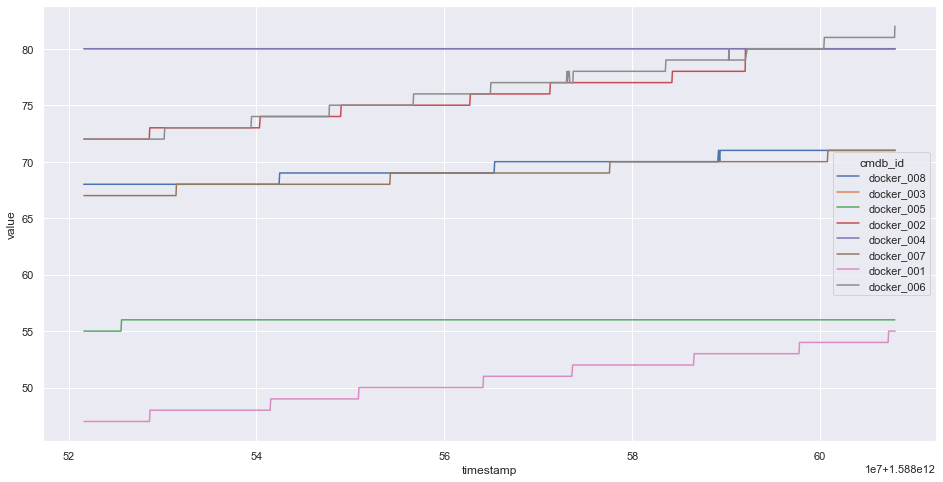

In [8]:
sns.lineplot(x='timestamp', y='value', hue='cmdb_id', data=df_docker[df_docker.name == 'container_mem_used'])

<ipython-input-9-05c844a72e24>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(x='timestamp', y='value', hue='cmdb_id', data=df_docker[df_docker.name == 'container_cpu_used'][df_docker.cmdb_id=='docker_003'])


<AxesSubplot:xlabel='timestamp', ylabel='value'>

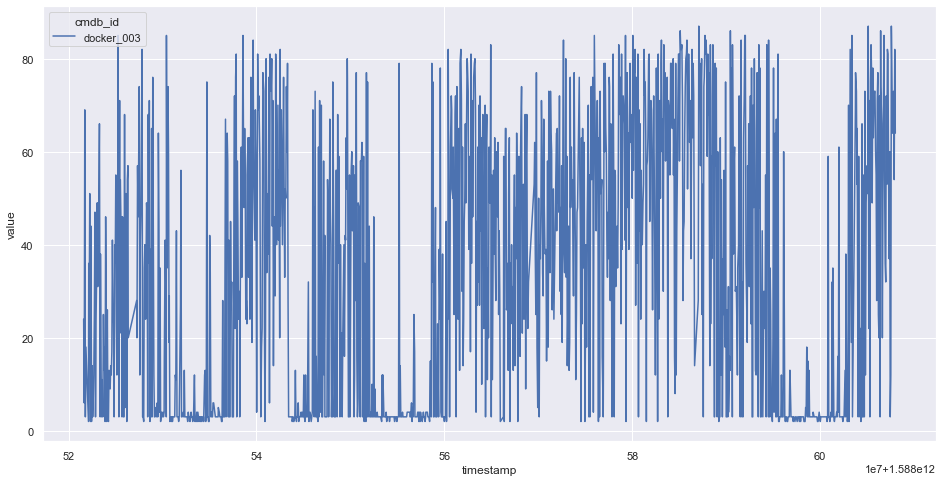

In [9]:
sns.lineplot(x='timestamp', y='value', hue='cmdb_id', data=df_docker[df_docker.name == 'container_cpu_used'][df_docker.cmdb_id=='docker_003'])

In [10]:
df_os_linux = dfs['os_linux']

In [11]:
for name in list(df_os_linux['name'].unique()):
    total_kpis += 1

    print(name, df_os_linux[df_os_linux.name == name]['value'].sum())

Sent_errors_packets 0.0
Processor_load_5_min 675.1644509999999
Disk_rd_ios 12.0
CPU_util_pct 64169.939011
Disk_io_util 16187.315354999997
Num_of_processes 1473511.0
Send_total 9837.065547
Outgoing_network_traffic 9202.555670999998
Memory_available_pct 2059172.5899999999
Incoming_network_traffic 7583.297953
Zombie_Process 137.0
Recv_total 8758717.290057
Page_po 12335163.0
CPU_idle_pct 3103511.552033
Processor_load_1_min 664.359662
Agent_ping 31680.0
Num_of_running_processes 7626.0
ss_total 9780785.0
Processor_load_15_min 719.20726
Page_pi 564.3493679999999
Disk_avgqu_sz 2114.771192
Disk_wr_kbs 12055.04108
Disk_await 68901.82
Shared_memory 1646679308.0
CPU_user_time 30221.877012000004
Disk_svctm 33201.31999999999
Disk_wr_ios 192483.0
Memory_used_pct 1102670.89
CPU_iowait_time 2520.4566449999998
System_wait_queue_length 6746.0
CPU_system_time 20618.078096999998
Disk_rd_kbs 0.551258
Memory_available 813757.6821399999
Memory_used 348181.67344700004
System_block_queue_length 78.0
Received_pa

<AxesSubplot:xlabel='timestamp', ylabel='value'>

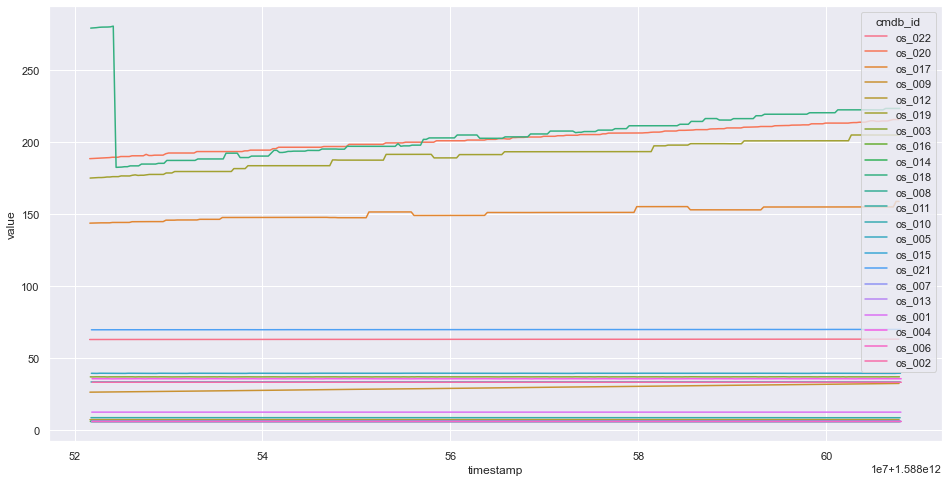

In [12]:
sns.lineplot(x='timestamp', y='value', hue='cmdb_id', data=df_os_linux[df_os_linux.name == 'FS_used_space'])


In [20]:
len(df_os_linux[df_os_linux.cmdb_id == 'os_012'][''].unique())

51